# 44 - Clustering: Gaussian Mixture Models con Scikit


* En este Notebook vamos a resolver un problema de ***Clusterización con el Gaussian Mixture Models usando la librería de Scikit-Learn***.


* Para resolver el problema de Clasificación vamos a utilizar la clase **"GaussianMixture()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html


* El ejemplo con el que vamos a trabajar, consiste en ***agrupar una serie de flores*** de las que sabemos ***los tamaños de su sépalo***.


* El objetivo es ***encontrar los parámetros de 'K' distribuciones (normales) de probabilidad*** que nos permitan clusterizar los elementos del Dataset.


* Una vez encontrados los parámetros ($\pi_k, \mu_k, \sigma_k$) de las distribuciones normales, asignaremos cada elemento del Dataset de la siguiente manera: 
<span></span><br><br>
<span style="font-size:18px">$$argmax \sum_{k=1}^{K} \pi_k \cdot  \frac{e^{-\frac{1}{2}(\frac{x-\mu_k}{\sigma_k})^2}}{\sigma_k}$$</span>


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    1. [Carga de datos](#M1)
<span></span><br>
    2. [Cambio de estructura de datos a numpy](#M2)
<span></span><br>
    3. [Visualización de los datos](#M3)
<span></span><br>
    4. [Creacción del modelo (hipótesis) y ajuste](#M4)
<span></span><br>
    5. [Obtención del modelo (hipótesis)](#M5)
<span></span><br>
    6. [Visualización de los resultados](#M6)


##### Importante: En los problemas de clusterización no conocemos el dominio de salida, por lo que para el problema que se plantea no vamos a saber el tipo de flor, solo vamos a saber los tamaños de las flores.


* En primer lugar vamos a importar las librería necesarias:

<hr>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
%matplotlib inline 

<hr>


## <a name="M1">1. Carga de datos</a>


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "./data/iris/iris_para_clustering.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas que nos interesan para el problema a resolver:
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo


In [2]:
df = pd.read_csv("./data/iris/iris_para_clustering.csv")
df[['sepal_length', 'sepal_width']].sample(5)

,sepal_length,sepal_width
118,7.7,2.6
42,4.4,3.2
97,6.2,2.9
95,5.7,3.0
141,6.9,3.1


<hr>


## <a name="M2">2. Cambio de estructura de datos a numpy
    
* Scikit necesita como entrada para el ajuste (o entrenamiento) de los modelos de Clustering los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.


* Por tanto, vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***)


In [3]:
X = df[['sepal_length', 'sepal_width']].values   # Obtengo el alto y ancho del sepalo

<hr>


## <a name="M3">3. Visualización de los datos
    

* Dado que el Gaussian Mixture Models es un algoritmo probabilístico, vamos a representar las distribuciones de cada una de las variables en un histograma.


* En esta caso se aprecia que cada una de las variables sigue una distribución normal, pero no podemos distiguir de manera visual más de una distribución normal en los datos.


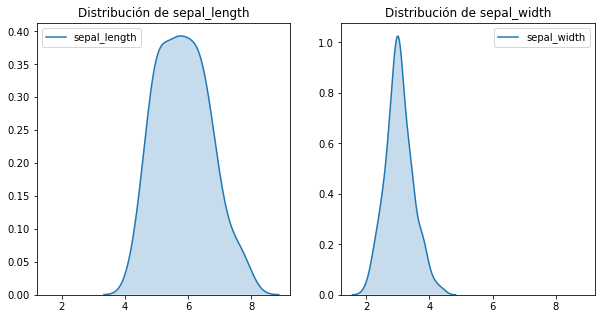

In [4]:
# Dibujamos las distribuciones de las 2 variables
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.kdeplot(df['sepal_length'], shade=True, ax=axes[0])
sns.kdeplot(df['sepal_width'], shade=True, ax=axes[1])
axes[0].title.set_text('Distribución de sepal_length')
axes[1].title.set_text('Distribución de sepal_width')

<hr>


## <a name="M4">4. Creacción del modelo (hipótesis) y ajuste
    
    
* Vamos a crear el modelo con 3 Clusters


In [5]:
# Creamos un objeto de la clase "GaussianMixture()" pasandole una serie de parámetros
gmm = GaussianMixture(n_components=3, init_params='kmeans', max_iter=50)

# Ajustamos el modelo siendo la 'X' el tamaño del sepalo
gmm.fit(X)

GaussianMixture(max_iter=50, n_components=3)

<hr>


## <a name="M5">5. Obtención del modelo (hipótesis)


* Tras ajustar el modelo podemos obtener los siguientes valores:

    1. ***Número de elementos por Cluster***: Tenemos que llamar al método ***".predict()"*** para que prediaga el cluster de cada elemento y luego contar cuandos elementos hay en cada Cluster.
    2. ***Media de las variables del Cluster***: Esto lo hacemos llamando al atributo ***"means_"*** de la clase GaussianMixture.
    3. ***Desviación típica de las variables del Cluster***: Esto lo hacemos llamando al atributo ***"covariances_"*** de la clase GaussianMixture, que nos devuelve la matriz de covarianzas y nos quedaremos con la diagonal.
    4. ***Probabilidad de pertenencia al Cluster***: Esto lo hacemos llamando al atributo ***"weights_"*** de la clase GaussianMixture.

In [6]:
items_cluster = gmm.predict(X)
medias_clusters = gmm.means_
desviaciones_clusters = gmm.covariances_
probabilidad_clusters = gmm.weights_
for i, c in enumerate(medias_clusters):
    print ('Cluster {c}'.format(c=(i + 1)))
    print ('\tNúmero de Items en el Cluster {n}'.format(n=items_cluster.tolist().count(i)))
    print ('\tCentroides: {centroides}'.format(centroides=medias_clusters[i]))
    print ('\tDesviación Típica: {desviacion}'.format(desviacion=np.diag(desviaciones_clusters[i])))
    print ('\tProbabilidad del Cluster: {prob:0.2f} %'.format(prob=(probabilidad_clusters[i] * 100)))

Cluster 1
	Número de Items en el Cluster 42
	Centroides: [6.6814044 3.0285628]
	Desviación Típica: [0.36087007 0.08923683]
	Probabilidad del Cluster: 29.47 %
Cluster 2
	Número de Items en el Cluster 59
	Centroides: [5.90114537 2.74385294]
	Desviación Típica: [0.27544608 0.09382524]
	Probabilidad del Cluster: 38.05 %
Cluster 3
	Número de Items en el Cluster 49
	Centroides: [5.01493896 3.4404862 ]
	Desviación Típica: [0.1194876  0.12147459]
	Probabilidad del Cluster: 32.47 %


<hr>


## <a name="M6">6. Visualización de los resultados


* Vamos a ver las distribuciones de cada una de las variables de los elementos asignados a cada Cluster para ver si el Gaussian Mixture Models ha conseguido extraer las diferentes distribuciones de los datos.


* Para ellos vamos a ***asignar a cada elemento del Dataset el Cluster que tiene mayor probabilidad de pertenencia usando el modelo generado*** por el Gaussian Mixture Models. Para realizar este paso usaremos el método ***".predict(X)"***.
    
    
* Por último vamos a dibujar las distribuciones de los elementos de cada Cluster en el que se puede apreciar como se distinguen las 3 distribuciones normales de cada Cluster por las variables 'sepal_length' y 'sepal_width'.


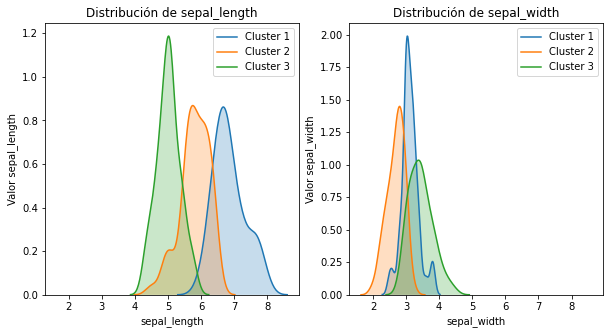

In [7]:
# Añadimos una nueva columna en el DataFrame para indicar la etiqueta de cada elemento
df['label'] = gmm.predict(X)
df['label'] = df['label'].apply(lambda x: 'Cluster {}'.format(x+1))


# Dibujamos las distribuciones de las 2 variables para cada uno de los Clusters
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
plt_position = [axes[0], axes[1]]
for index, col in enumerate(df[['sepal_length', 'sepal_width']].columns):
    for i in np.sort(df['label'].unique()):
        df_plot = df[df['label'] == i][['label', col]] 
        sns.kdeplot(df_plot[col], shade=True, label=i, ax=plt_position[index])
    plt_position[index].title.set_text('Distribución de {}'.format(col))
    plt_position[index].set_xlabel(col)
    plt_position[index].set_ylabel('Valor {}'.format(col))

* A continuación pasamos a representar en un espacio de dos dimensiones cómo quedarian los elementos de cada cluster distribuidos en función de las dimensiones de su sepalo.


* En primer lugar vamos a definir una malla de puntos ("meshgrid") que se utilizará para pintar las regiones de cada cluster. El objetivo de construir esta malla es la de predecir cada punto de la malla como si fuesen los datos de entrada de una flor con esos valores de alto y ancho.


* Para ello miramos los valores máximos y mínimos de los tamaños de la flor para acotar la región a pintar y posteriormente generamos el conjunto de puntos a predecir (asignar en el Cluster).

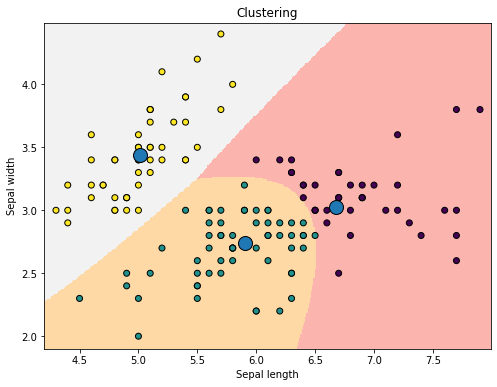

In [8]:
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predicción de cada uno de los puntos de la malla
Z = gmm.predict(np.c_[xx.ravel(), yy.ravel()])

# Pasamos a pintar las regiones de cada Cluster así como los datos del dataset.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))

# Dibujamos la malla con los diferentes colores
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


# Dibujamos los puntos (flores) del dataset
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolors='k', cmap=plt.cm.viridis)

# Dibujamos los Centroides
centroides = gmm.means_
plt.plot(centroides[:, 0], centroides[:, 1], 'o', markeredgecolor='k', markersize=14)

plt.title('Clustering')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">